In [2]:
import pandas as pd

# Adjust this number based on the line from above!
damage_df = pd.read_csv("../data/Damage_cost_curves.tab", sep="\t", skiprows=37)

# Check the first few rows
damage_df.head()

,ID (Cluster ID),Name (of City),Country,Latitude,Longitude,Damage cost [million EUR] (0.0 m flood height),Damage cost [million EUR] (0.5 m flood height),Damage cost [million EUR] (1.0 m flood height),Damage cost [million EUR] (1.5 m flood height),Damage cost [million EUR] (2.0 m flood height),...,Damage cost [million EUR] (7.5 m flood height),Damage cost [million EUR] (8.0 m flood height),Damage cost [million EUR] (8.5 m flood height),Damage cost [million EUR] (9.0 m flood height),Damage cost [million EUR] (9.5 m flood height),Damage cost [million EUR] (10.0 m flood height),Damage cost [million EUR] (10.5 m flood height),Damage cost [million EUR] (11.0 m flood height),Damage cost [million EUR] (11.5 m flood height),Damage cost [million EUR] (12.0 m flood height)
0,001,"Antwerp, Brussels, Ghent, Louvain",Belgium,50.98310,4.35072,130.896,278.076,444.161,1105.189,1730.505,...,81937.529,95614.990,110339.211,125071.310,139796.847,154274.083,168972.217,183049.061,196818.156,209491.338
1,002,London,United Kingdom,51.48843,-0.20368,1.942,103.819,217.430,329.901,484.095,...,22853.169,26395.474,30711.618,34663.107,38934.337,43204.717,47569.307,52104.922,57148.202,61989.970
2,003,"Liverpool, Manchester",United Kingdom,53.48601,-2.43174,0.000,33.352,63.544,94.810,127.667,...,596.381,667.988,752.743,852.832,965.002,1090.923,1238.794,1464.988,1685.453,1943.091
3,004,Istanbul,Turkey,40.99156,29.03468,0.588,52.825,123.506,204.806,400.431,...,3488.545,3929.442,4363.051,4820.747,5269.045,5816.070,6292.248,6780.771,7273.039,7757.326
4,005,Hamburg,Germany,53.58154,10.01751,547.632,1304.657,2214.937,3528.520,5048.140,...,26494.400,27988.417,29163.193,30233.788,31137.270,31949.212,32729.755,33458.276,34168.859,40028.813


In [3]:
import pandas as pd

# Step 1: Skip the metadata/header (adjust skiprows if needed, 37 is often correct here too)
protection_df = pd.read_csv("../data/Protection_cost_curves_high_estimate.tab", sep="\t", skiprows=37)

# Step 2: Display first few rows
protection_df.head()

,ID (Cluster ID),Name (of City),Country,Latitude,Longitude,Protection cost [million EUR] (0.0 m protection height (high...),Protection cost [million EUR] (0.5 m protection height (high...),Protection cost [million EUR] (1.0 m protection height (high...),Protection cost [million EUR] (1.5 m protection height (high...),Protection cost [million EUR] (2.0 m protection height (high...),...,Protection cost [million EUR] (7.5 m protection height (high...),Protection cost [million EUR] (8.0 m protection height (high...),Protection cost [million EUR] (8.5 m protection height (high...),Protection cost [million EUR] (9.0 m protection height (high...),Protection cost [million EUR] (9.5 m protection height (high...),Protection cost [million EUR] (10.0 m protection height (hig...),Protection cost [million EUR] (10.5 m protection height (hig...),Protection cost [million EUR] (11.0 m protection height (hig...),Protection cost [million EUR] (11.5 m protection height (hig...),Protection cost [million EUR] (12.0 m protection height (hig...)
0,001,"Antwerp, Brussels, Ghent, Louvain",Belgium,50.98310,4.35072,1198.253,2197.284,3336.806,5543.075,7876.286,...,142956.855,166579.274,191765.316,218100.400,245437.546,273919.492,303520.317,333972.734,364981.354,396651.266
1,002,London,United Kingdom,51.48843,-0.20368,4.514,199.133,443.000,779.664,1190.546,...,14839.009,16564.244,18329.539,20125.524,21942.200,24248.740,26161.480,28096.598,30067.835,32053.776
2,003,"Liverpool, Manchester",United Kingdom,53.48601,-2.43174,0.000,52.336,144.542,258.192,390.877,...,3188.216,3568.512,3977.409,4423.243,4886.628,5370.346,5900.912,6447.117,7020.362,7622.492
3,004,Istanbul,Turkey,40.99156,29.03468,5.971,423.000,1071.579,1872.755,3497.408,...,20615.707,22503.551,24418.740,26363.548,28339.718,30353.691,32390.207,34455.020,36554.162,38668.268
4,005,Hamburg,Germany,53.58154,10.01751,2170.273,4199.936,6834.509,10257.466,14108.564,...,76904.202,83667.018,90200.293,96852.705,103510.540,110243.013,117029.642,123965.776,130940.649,138060.218


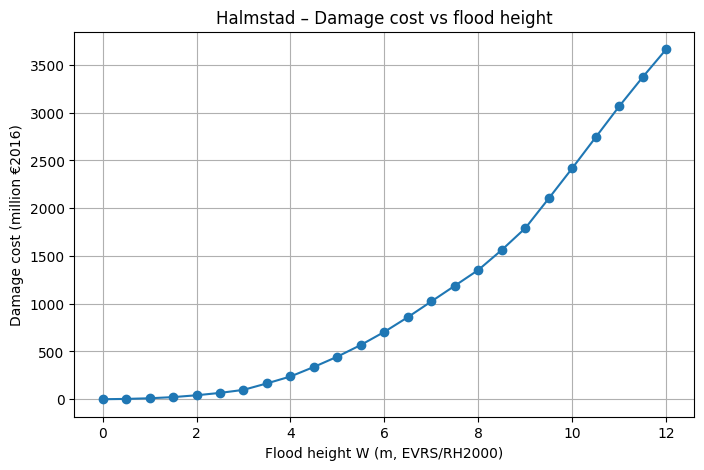

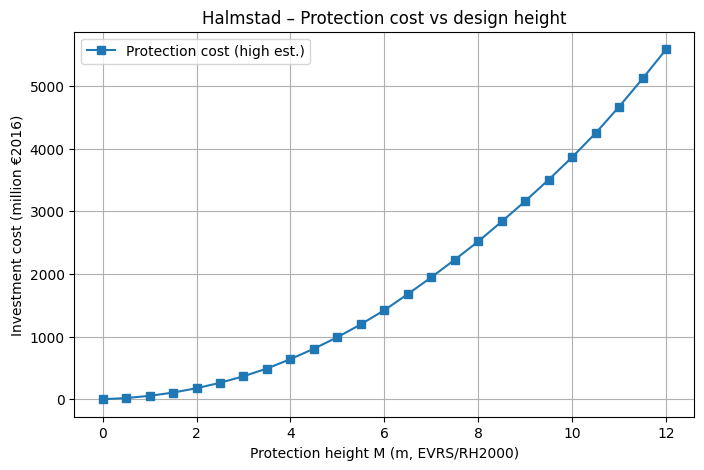

Damage at 2.3 m: 56.228 million €
Total cost at W=2.3 m with M=2.0 m: 231.713 million €


In [4]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)

# ---------- Robust loaders ----------

def load_prahl_table(path, skiprows=37):
    """Load a Prahl .tab file and strip column whitespace."""
    df = pd.read_csv(path, sep="\t", skiprows=skiprows, engine="python")
    df.columns = [c.strip() for c in df.columns]
    return df

def guess_name_col(df):
    """Find the column that contains the city/cluster name."""
    cands = []
    for c in df.columns:
        cs = c.lower()
        if "name" in cs or "city" in cs or "cluster" in cs:
            cands.append(c)
    if not cands:
        raise KeyError(f"No obvious name column. Columns:\n{df.columns.tolist()}")
    # prefer columns starting with 'Name'
    for c in cands:
        if c.lower().startswith("name"):
            return c
    return cands[0]

def pick_city_row(df, city="Halmstad"):
    """Case-insensitive selection of the first row whose name contains the city."""
    name_col = guess_name_col(df)
    mask = df[name_col].astype(str).str.contains(city, case=False, na=False)
    if not mask.any():
        # help the user by printing nearby examples
        ex = df[name_col].astype(str).head(20).tolist()
        raise ValueError(f"City '{city}' not found. First few names: {ex}")
    return df.loc[mask].iloc[0], name_col

HEIGHT_COL_RE = re.compile(
    r".*?\b(\d+(?:\.\d+)?)\s*m\b(?:[^A-Za-z0-9]|$)",  # capture number before ' m'
    flags=re.IGNORECASE,
)

def wide_row_to_series(row):
    """
    Convert a wide row into Series indexed by height in meters.
    Accepts headers like:
      - '0.5 m'
      - 'Damage cost [million EUR] (0.5 m flood height)'
      - 'Protection cost [million EUR] 2.0 m protection height'
    """
    heights, vals = [], []
    for col, val in row.items():
        m = HEIGHT_COL_RE.match(str(col))
        if m:
            h = float(m.group(1))
            try:
                v = float(val)
            except Exception:
                v = np.nan
            heights.append(h); vals.append(v)
    if not heights:
        raise ValueError(
            "No height columns detected. Inspect your columns:\n"
            + "\n".join(list(row.index)[:20])
        )
    s = pd.Series(vals, index=heights).sort_index().astype(float)
    # Drop columns that are entirely NaN (rare)
    s = s[~np.isnan(s.values)]
    return s

# ---------- Load your two tables ----------
damage_df = load_prahl_table("../data/Damage_cost_curves.tab", skiprows=37)
protection_df = load_prahl_table("../data/Protection_cost_curves_high_estimate.tab", skiprows=37)

# ---------- Extract Halmstad ----------
damage_row_halmstad, damage_name_col = pick_city_row(damage_df, "Halmstad")
prot_row_halmstad, prot_name_col     = pick_city_row(protection_df, "Halmstad")

# ---------- Height -> value series ----------
C_damage = wide_row_to_series(damage_row_halmstad)   # million € vs flood height
C_protect_high = wide_row_to_series(prot_row_halmstad)  # million € vs design height

# ---------- Plot damage ----------
fig, ax = plt.subplots()
ax.plot(C_damage.index, C_damage.values, marker="o")
ax.set_title("Halmstad – Damage cost vs flood height")
ax.set_xlabel("Flood height W (m, EVRS/RH2000)")
ax.set_ylabel("Damage cost (million €2016)")
ax.grid(True)
plt.show()

# ---------- Plot protection (high estimate) ----------
fig, ax = plt.subplots()
ax.plot(C_protect_high.index, C_protect_high.values, marker="s", label="Protection cost (high est.)")
ax.set_title("Halmstad – Protection cost vs design height")
ax.set_xlabel("Protection height M (m, EVRS/RH2000)")
ax.set_ylabel("Investment cost (million €2016)")
ax.legend()
ax.grid(True)
plt.show()

# ---------- Optional: continuous interpolators ----------
def C_W(w):      # damage at arbitrary flood height w
    return np.interp(w, C_damage.index, C_damage.values)

def C_M(m):      # protection cost at arbitrary design height m
    return np.interp(m, C_protect_high.index, C_protect_high.values)

def C_WM(w, M):  # total cost with levee height M
    return C_M(M) if w <= M else C_M(M) + C_W(w)

print("Damage at 2.3 m:", round(C_W(2.3), 3), "million €")
print("Total cost at W=2.3 m with M=2.0 m:", round(C_WM(2.3, 2.0), 3), "million €")

In [5]:
import re
import numpy as np
import pandas as pd

TARGET_CITY = "Halmstad"
SKIPROWS = 37

# 1) Load three tables
damage_df    = pd.read_csv("../data/Damage_cost_curves.tab", sep="\t", skiprows=SKIPROWS, engine="python")
prot_high_df = pd.read_csv("../data/Protection_cost_curves_high_estimate.tab", sep="\t", skiprows=SKIPROWS, engine="python")
prot_low_df  = pd.read_csv("../data/Protection_cost_curves_low_estimate.tab",  sep="\t", skiprows=SKIPROWS, engine="python")

for df in (damage_df, prot_high_df, prot_low_df):
    df.columns = [c.strip() for c in df.columns]

# 2) Find columns
def pick_name_col(cols):
    # Prefer columns that actually contain 'name' and NOT 'id'
    # (PANGAEA often uses 'Name (Name)' for city)
    name_like = [c for c in cols if ("name" in c.lower()) and ("id" not in c.lower())]
    if name_like:
        # Prefer those that start with 'Name'
        for c in name_like:
            if c.lower().startswith("name"):
                return c
        return name_like[0]
    return None

def pick_id_col(cols):
    ids = [c for c in cols if "id" in c.lower()]
    return ids[0] if ids else None

name_col_dmg = pick_name_col(damage_df.columns)
id_col_dmg   = pick_id_col(damage_df.columns)
name_col_ph  = pick_name_col(prot_high_df.columns)
id_col_ph    = pick_id_col(prot_high_df.columns)
name_col_pl  = pick_name_col(prot_low_df.columns)
id_col_pl    = pick_id_col(prot_low_df.columns)

if name_col_dmg is None:
    raise KeyError(f"No city name column found in damage table. Columns: {list(damage_df.columns)[:12]}")

# 3) Get Halmstad row from damage (by name), then ID to match protections
mask = damage_df[name_col_dmg].astype(str).str.contains(TARGET_CITY, case=False, na=False)
if not mask.any():
    raise ValueError(
        f"City '{TARGET_CITY}' not found in damage table column '{name_col_dmg}'. "
        f"Here are a few: {damage_df[name_col_dmg].astype(str).head(20).tolist()}"
    )
halm_row_dmg = damage_df.loc[mask].iloc[0]
halm_id = halm_row_dmg[id_col_dmg] if id_col_dmg in damage_df.columns else None

def get_match_row(df, name_col, id_col, city, fallback_id):
    if name_col and df[name_col].astype(str).str.contains(city, case=False, na=False).any():
        return df.loc[df[name_col].astype(str).str.contains(city, case=False, na=False)].iloc[0]
    if (id_col is not None) and (fallback_id is not None):
        if (df[id_col] == fallback_id).any():
            return df.loc[df[id_col] == fallback_id].iloc[0]
    # if still no luck, print candidates to help
    show_col = name_col or id_col
    raise ValueError(
        f"Could not locate '{city}' in this table. "
        f"Sample values from '{show_col}': {df[show_col].astype(str).head(20).tolist()}"
    )

halm_row_ph = get_match_row(prot_high_df, name_col_ph, id_col_ph, TARGET_CITY, halm_id)
halm_row_pl = get_match_row(prot_low_df,  name_col_pl, id_col_pl,  TARGET_CITY, halm_id)

# 4) Extract numeric height columns like "... 0.5 m ..." or "(2.0 m flood height)"
HEIGHT_RE = re.compile(r"\b(\d+(?:\.\d+)?)\s*m\b", re.IGNORECASE)

def row_to_series(row):
    heights, vals = [], []
    for col, val in row.items():
        m = HEIGHT_RE.search(str(col))
        if m:
            try:
                heights.append(float(m.group(1)))
                vals.append(float(val))
            except Exception:
                pass
    if not heights:
        raise ValueError("No '<number> m' columns found in the row. Check headers.")
    s = pd.Series(vals, index=heights).sort_index().astype(float)
    return s

C_damage        = row_to_series(halm_row_dmg)   # million € vs flood height
C_protect_high  = row_to_series(halm_row_ph)    # million € vs levee height
C_protect_low   = row_to_series(halm_row_pl)    # million € vs levee height

# 5) Save tidy CSV (raw)
damage_out = pd.DataFrame({
    "series": "damage",
    "height_m": C_damage.index.astype(float),
    "cost_million_eur": C_damage.values.astype(float),
})
prot_low_out = pd.DataFrame({
    "series": "protection_low",
    "height_m": C_protect_low.index.astype(float),
    "cost_million_eur": C_protect_low.values.astype(float),
})
prot_high_out = pd.DataFrame({
    "series": "protection_high",
    "height_m": C_protect_high.index.astype(float),
    "cost_million_eur": C_protect_high.values.astype(float),
})

out_df = pd.concat([damage_out, prot_low_out, prot_high_out], ignore_index=True)
out_df.to_csv("../data/halmstad_cost_curves_tidy.csv", index=False)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load tidy curves ---
df = pd.read_csv("../data/halmstad_cost_curves_tidy.csv")

# --- Helpers ---